<a href="https://colab.research.google.com/github/skj092/Global-Wheat-Detection-YOLO/blob/main/global_wheat_detection_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Wheat Detection using YOLO

## Clone the repository

In [1]:
!git clone https://github.com/skj092/Global-Wheat-Detection-YOLO.git

Cloning into 'Global-Wheat-Detection-YOLO'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 29 (delta 12), reused 5 (delta 1), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [2]:
cd Global-Wheat-Detection-YOLO

/content/Global-Wheat-Detection-YOLO


## Globa the yolov5 repository

In [3]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12234, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 12234 (delta 0), reused 1 (delta 0), pack-reused 12229
Receiving objects: 100% (12234/12234), 11.97 MiB | 33.05 MiB/s, done.
Resolving deltas: 100% (8470/8470), done.


## Settin up Directory structure for the YOLO

In [5]:
%%bash

mkdir data
mkdir data/input
mkdir data/preprocessed
mkdir data/preprocessed/images
mkdir data/preprocessed/labels
mkdir data/preprocessed/images/train
mkdir data/preprocessed/images/validation
mkdir data/preprocessed/labels/train
mkdir data/preprocessed/labels/validation

## Downloading dataset using kaggle api

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sonujha090","key":"3e3917e84c697e121e18b257310f9362"}'}

In [10]:
!mkdir ../../root/.kaggle/

In [12]:
!cp kaggle.json ../../root/.kaggle

In [13]:
cd data/input

/content/Global-Wheat-Detection-YOLO/data/input


In [14]:
!kaggle competitions download -c global-wheat-detection

 98% 595M/607M [00:01<00:00, 289MB/s]
100% 607M/607M [00:01<00:00, 319MB/s]


In [ ]:
!unzip global-wheat-detection.zip

In [18]:
!cd /content/Global-Wheat-Detection-YOLO

In [23]:
ls

data/                              kaggle.json  munge_data.py  requirements.txt
global_wheat_detection_yolo.ipynb  LICENSE      README.md      yolov5/


In [24]:
!python munge_data.py

100% 3035/3035 [00:02<00:00, 1040.35it/s]
100% 338/338 [00:00<00:00, 1037.04it/s]


## Preparing training setup

In [25]:
cd yolov5

/content/Global-Wheat-Detection-YOLO/yolov5


In [26]:
!touch wheat.yaml

In [27]:
# train: ../data/preprocessed/images/train
# val: ../data/preprocessed/images/validation
# nc: 1
# names: ["wheat"]

In [1]:
!python train.py --img 1024 --batch 4  --epochs 2 --data wheat.yaml 

python3: can't open file 'train.py': [Errno 2] No such file or directory


## After restart runtime

In [2]:
cd Global-Wheat-Detection-YOLO/

/content/Global-Wheat-Detection-YOLO


In [3]:
cd yolov5

/content/Global-Wheat-Detection-YOLO/yolov5


In [4]:
!python train.py --img 1024 --batch 4  --epochs 2 --data wheat.yaml 

train: weights=yolov5s.pt, cfg=, data=wheat.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2, batch_size=4, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-251-gc23a441 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.

# Prediction

In [5]:
!cp /content/Global-Wheat-Detection-YOLO/yolov5/runs/train/exp2/weights/best.pt .

In [6]:
!python detect.py --source /content/Global-Wheat-Detection-YOLO/data/input/test --weights best.pt

detect: weights=['best.pt'], source=/content/Global-Wheat-Detection-YOLO/data/input/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-251-gc23a441 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
image 1/10 /content/Global-Wheat-Detection-YOLO/data/input/test/2fd875eaa.jpg: 640x640 29 wheats, Done. (0.013s)
image 2/10 /content/Global-Wheat-Detection-YOLO/data/input/test/348a992bb.jpg: 640x640 36 wheats, Done. (0.013s)
image 3/10 /content/Global-Wheat-Detection-YOLO/data/input/test/51b3e36ab.jpg: 640x640 28 wheats, Done. (0.016s)
image 4/10 /content/Glob

## Results

In [7]:
from IPython.display import Image

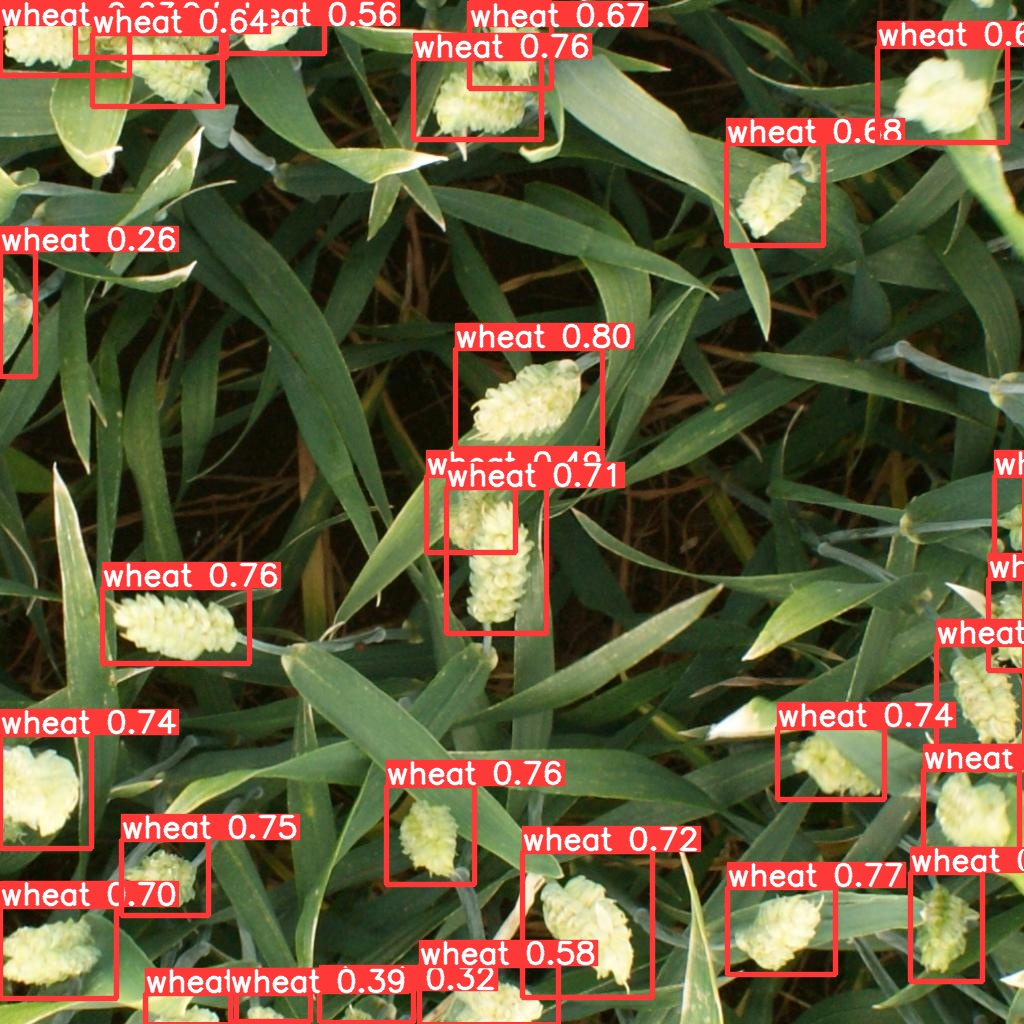

In [8]:
Image(filename='/content/Global-Wheat-Detection-YOLO/yolov5/runs/detect/exp/2fd875eaa.jpg') 

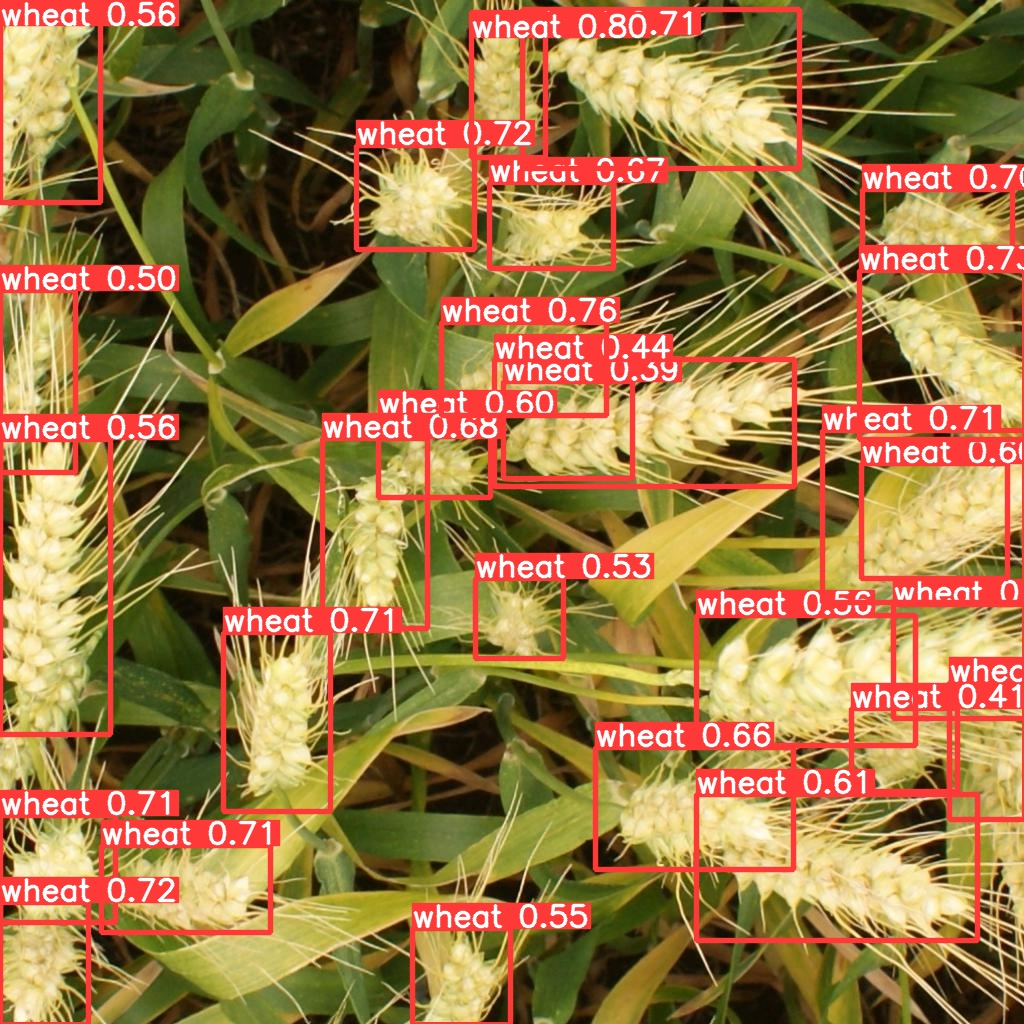

In [9]:
Image(filename='/content/Global-Wheat-Detection-YOLO/yolov5/runs/detect/exp/51b3e36ab.jpg') 